## Titanic : Machine Learning - 

![](img/titanic.jpeg)

## Notebook

Este notebook faz parte do conjunto de projetos de data science, machine learning ao qual estarei apresentando meus estudos nesta área.

## Checklist

1. Definição do Problema
2. Obtenção dos Dados
3. Exploração dos Dados
4. Preparação dos Dados
5. Construção do Modelo
6. Avaliação
7. Referências\Fontes

## 1. Definição do Problema

Este notebook foi desenvolvido com base em um dos Projetos de ML mais utilizados para aprendizado "**Titanic**".
O navio a vapor de luxo RMS Titanic afundou nas primeiras horas de **15 de abril de 1912**, na costa de Terra Nova, no Atlântico Norte, depois de colidir com um iceberg durante sua viagem inaugural, dos **2.240** passageiros e tripulantes a bordo, mais de **1.500** perderam a vida no desastre. Titanic inspirou inúmeros livros, artigos e filmes, e sua história entrou na consciência pública como um conto de advertência sobre os perigos da arrogância humana.
Alguns fatores contribuiram para o aumento de perda de vidas, dentre eles, o desespero, o caos levando a utilizarem a capacidade dos botes salva-vidas pela metade, outro item foi a redução do numero de botes de 32 inicialmente para apenas 20.

Para se ter uma ideia da Dimensão Gigantesca do Navio para aquela epoca, O Titanic tinha **269,1** metros de comprimento, o maior navio de passageiros naquela epoca. Hoje, o Symphony of the Seas é o maior navio de passageiros em operação, com **362** metros de comprimento.
Para as pessoas que tiverem curiosidade em dados da estrutura do navio, analises dos fatores relacionados ao acidente, podem acessar os links abaixo no ultimo topico.

### Objetivo

Essa análise é realizada com o proposito de ampliar o conhecimento, visão dos dados dos passageiros contidos no dataset e através das tecnicas e modelos utilizados descobrir quais fatores levaram o indice de sobrevivencia ser "True" ou "False".


### Métrica de Classificação

O dataset contempla um atributo **"survived"** ao qual representa nossa variavel target.


## 2. Obtenção dos Dados

O conjunto de dados se encontra disponivel através da biblioteca Seaborn, faz parte de um dos datasets incorporados ao Modulo.

*Este conjunto de dados é uma AMOSTRA da população, todas as quantidades expressas aqui representam dados da amostra.

Este dataset é composto de 891 registros e 15 variaveis ( colunas ).O dataset possui valores ausentes ( NaN ).

A divisao do dataset em Treinamento e Teste sera realizado pelo metodo sklearn.model_selection import train_test_split, tendo o padrao de 75% de dados utilizados para treinamento e 25% de dados utilizados para teste do modelo.

-**`Install e Import - Modulos\Packages `**

In [1]:
import sys
# pacotes/modulos para trabalhar com operacoes do sistema operacional ( copy, paste, delete, files ...etc.)
import os
#verificando versao do python
import platform  
platform.python_version()
# Modulo Pandas é uma biblioteca Python que fornece estruturas e ferramentas de análise de dados, manipulação de dados, etc..
import pandas as pd
# Modulo Numpy é uma biblioteca Python que fornece recursos para manipulação de calculos, utilizando arrays, geração de numeros.
import numpy as np
# Estaremos utilizando 3 bibliotecas graficas seaborn e matplotlib.
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

**Define um estilo para nossos plots**

In [2]:
plt.style.use('ggplot')

**Conexão aos dados**

In [3]:
# carregamos o dataset titanic ao qual ja vem com a biblioteca Seaborn
dftitanic = sns.load_dataset('titanic')

In [4]:
# o tipo de objeto que o seaborn retorna os dados é no formato de uma dataframe Pandas
type(dftitanic)

pandas.core.frame.DataFrame

-**`Visualizando as dimensoes ( linhas, colunas ) do Dataframe`**

In [5]:
# verificando as dimensões do DataFrame.
# utilizamos o metodo shapeao qual nos fornece o numero de linhas ( shape[0] ) e colunas ( shape[1] ).
print("Variaveis:\t{}\nRegistros:\t{}".format(dftitanic.shape[1], dftitanic.shape[0]))

Variaveis:	15
Registros:	891


## 3. Exploração dos Dados

Em uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores faltantes, presença de outliers e tipo de distribuição.

Como se trata de um Aprendizado Supervisionado (*Supervised Learning*), a variável **```survived```** é definida como sendo a nossa variável alvo (*target*).

### Dicionário de Dados

![](img/datatypestitanic.png)

-**`Visualizando as 10 primeiras linhas do Dataframe`**

In [6]:
# o metodo head() nos fornece as 5 primeiras linhas do nosso dataframe por padrao, podemos informar o numero de linhas desejado.
dftitanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


-**`Visualizando as informações de colunas do Dataframe`**

In [7]:
# o metodo info() nos fornece os atributos ( variaveis ) , numero de registros , tipo do objeto que estao contidos no dataframe.
dftitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


**- `Informações estatísticas das colunas Dataframe`**

In [8]:
# identificar o tipo de cada variável
display(dftitanic.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [9]:
# Este metodo apresenta as medidas centrais de variaveis numericas.
# sem o uso de parametros retorna metricas somente para campos do tipo numerico.
dftitanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Pouca gente sabe que o método ```df.describe()``` pode ser usado também para ver algo sobre a estatística descritiva em colunas que não são números. Para isso, é só passar os argumentos ```include=['O','bool','all']```. 

**ATENÇÃO, é a letra 'O', e não o número 0!**

In [10]:
# Este metodo apresenta as medidas de contagem, valores unicos e frequencia do maximo valor de variaveis 
# categoricas e booleanas.
# com o uso de parametros retorna metricas somente para campos do tipo object e booleano.
dftitanic.describe(include=['O','bool'])

,sex,embarked,who,adult_male,embark_town,alive,alone
count,891,889,891,891,889,891,891
unique,2,3,3,2,3,2,2
top,male,S,man,True,Southampton,no,True
freq,577,644,537,537,644,549,537


**Consultando dados nulos ou Missing Values no Dataframe**

In [11]:
# O uso desse conjunto de metodos permite identificar qua(l)(is) variave(l)(is) possuem valor null (NaN ) e qtos registros
dftitanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Analise da Distribuição de Passageiros 

<IPython.core.display.Javascript object>


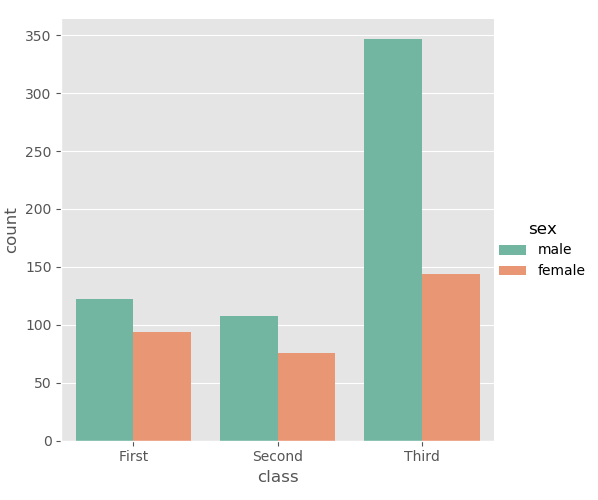

In [16]:
%matplotlib notebook
sns.catplot(x="class", hue="sex", data=dftitanic, kind="count", palette="Set2");

#### `Conclusões`:

- *Podemos verificar de acordo com o grafico acima que nas 3 classes a proporção de passageiros do sexo masculino é maior que a classe feminina, sendo que na 3ª classe alcança mais que o dobro.*

<IPython.core.display.Javascript object>


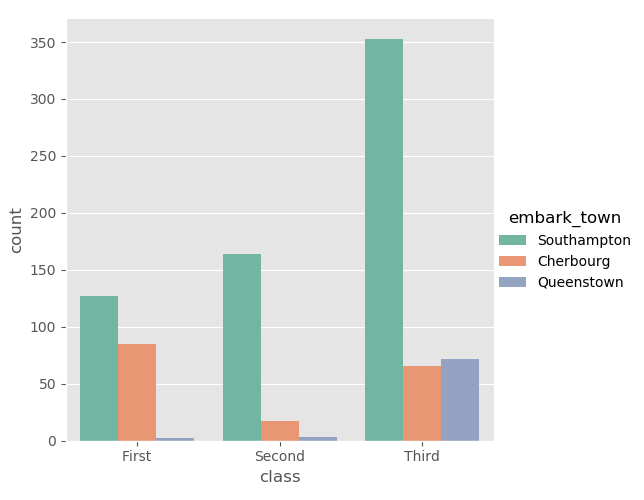

In [17]:
%matplotlib notebook
sns.catplot(x="class", hue="embark_town", data=dftitanic, kind="count", palette="Set2");

#### `Conclusões`:

- *Podemos verificar de acordo com o grafico acima que o Porto de Embarque "Southampton" foi o porto de maior concentração de embarques nas 3 classes.*

<IPython.core.display.Javascript object>


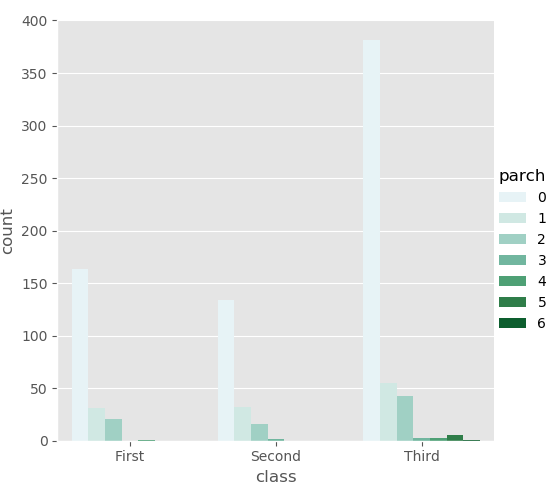

In [18]:
%matplotlib notebook
sns.catplot(x="class", kind='count',data=dftitanic, hue="parch", palette="BuGn");

#### `Conclusões`:

- *Podemos verificar neste grafico acima que a relação de parentesco envolvendo ( pais, mães, filhos, filhas ) segue uma distribuição semelhante entre as classes, alterando apenas as faixas de valores, mantendo as posições.*

<IPython.core.display.Javascript object>


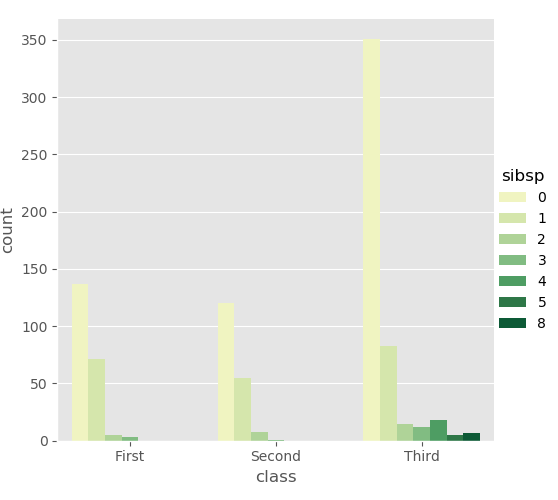

In [15]:
%matplotlib notebook
sns.catplot(x="class", kind='count',data=dftitanic, hue="sibsp", palette="YlGn");

#### `Conclusões`:

- *Podemos verificar neste grafico acima que a relacao de parentesco envolvendo ( esposa, esposo, irmãs, irmãos ) segue uma distribuição semelhante entre as classes, alterando apenas as faixas de valores, mantendo as posições, demonstrando uma superioridade em passageiros solteiros, sem irmãos, irmãs.*

###  Analise da Distribuição de Sobreviventes 

In [519]:
# Apresenta o agrupamento por um campo e a contagem dos classes, frequencia , 342 passageiros sobreviveram ao desastre.
dftitanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<IPython.core.display.Javascript object>


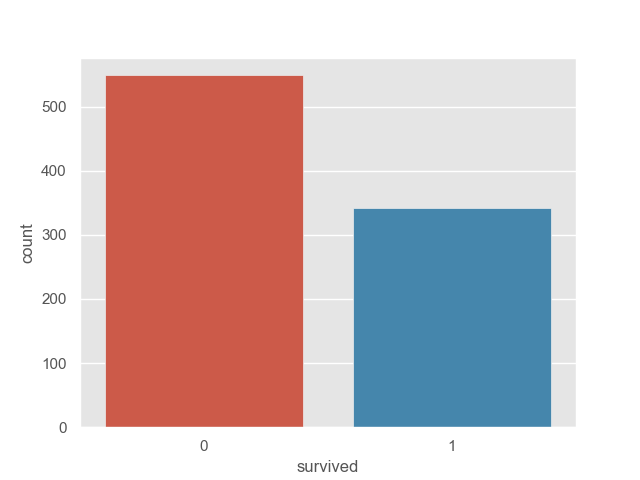

In [520]:
%matplotlib notebook
sns.countplot(dftitanic['survived']);

#### `Conclusões`:

- *Podemos verificar neste grafico acima que do total de 891 passageiros, 342 sobreviveram.*

<IPython.core.display.Javascript object>


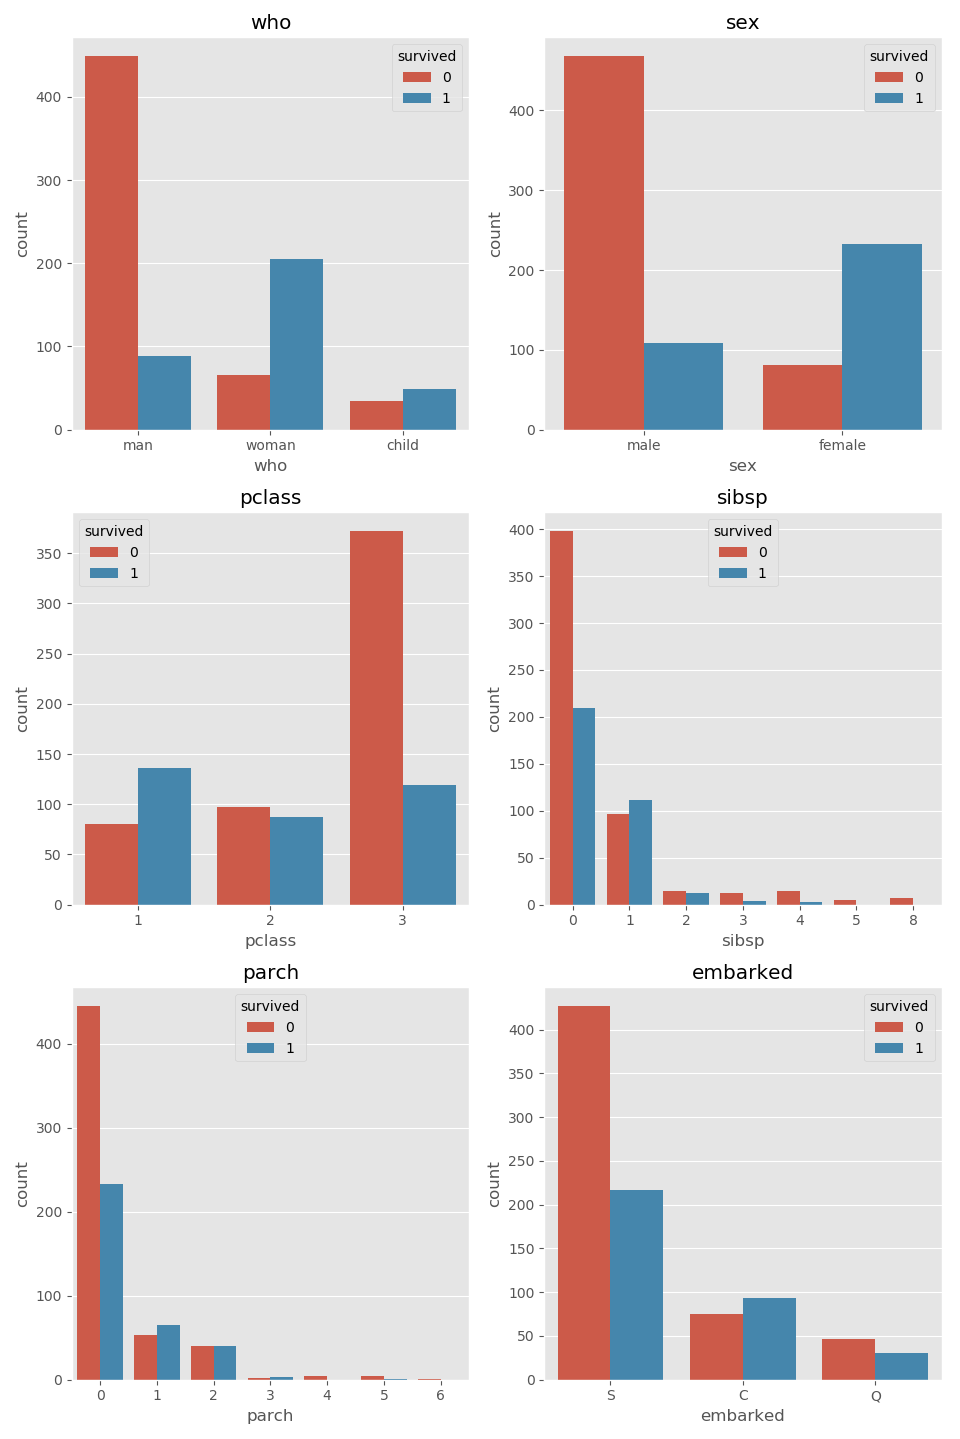

In [19]:
# Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
%matplotlib notebook
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 3
n_cols = 2

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4.8,n_rows*4.8))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(dftitanic[cols[i]], hue=dftitanic["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='best') 
        
plt.tight_layout();  

#### `Conclusões`:

- *Podemos verificar nos graficos acima as seguintes conclusões:.*
- *Podemos verificar que para a variavel categorica "Who", homens não tiverem um indice de sobrevivencia superior, sendo mulheres e crianças com um indice superior de sobrevivencia.*
- *Podemos verificar que para a variavel categorica "Sex", o sexo masculino não teve um indice de sobrevivencia superior, sendo o sexo feminino com um indice superior de sobrevivencia.*
- *Podemos verificar que para a variavel categorica "Pclass", o indice de sobrevivencia foi superior na 2ª Classe, sendo nas outras classes um indice inferior de sobrevivencia.*
- *Podemos verificar que para a variavel categorica "Sibsp", o indice de sobrevivencia foi superior para o valor 1, indicando que passageiros com grau de parentesco ( esposa, esposo, irmãos, irmãs ) de 1 tiveram maior indice de sobrevivencia.*
- *Podemos verificar que para a variavel categorica "Parch", o indice de sobrevivencia foi superior para o valor 1, indicando que passageiros com grau de parentesco ( pai, mae, filho, filha ) de 1 tiveram maior indice de sobrevivencia e com valor 2, praticamente a mesmo indice entre sobreviventes e não sobreviventes.*
- *Podemos verificar que para a variavel categorica "Embarked", o indice de sobrevivencia foi superior para o valor C, indicando que passageiros que embarcaram em Cherbourg tiveram um indice de sobrevivencia maior.*

In [20]:
# Percentual de sobreviventes por Sexo
dftitanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [21]:
# Analise de sobreviventes por sexo com valores absolutos
dftitanic.pivot_table(index="sex",columns="survived",aggfunc='size',fill_value=0)

survived,0,1
sex,,
female,81,233
male,468,109


#### `Conclusões`:

- *Podemos observar que 74,20% de todas as mulheres sobreviveram, enquanto apenas 18,9% de todos os homens sobreviveram.*

In [22]:
# Analise de sobreviventes por sexo
dftitanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [23]:
# Analise de sobreviventes por sexo com valores absolutos
dftitanic.pivot_table(index="sex",columns=["class","survived"],aggfunc='size',fill_value=0)

class    First     Second     Third    
survived     0   1      0   1     0   1
sex                                    
female       3  91      6  70    72  72
male        77  45     91  17   300  47

#### `Conclusões`:

- *Podemos observar que na 1ª Classe praticamente quase todas as mulheres sobreviveram, 96,8% equivalente a 91.*
- *Podemos observar que na 2ª Classe é onde ocorre a maior diferença na taxa de sobrevivencia entre homens e mulheres.*
- *Podemos observar que na 3ª Classe é onde homens tiveram a menor taxa de sobrevivencia entre a classe, 13,54%.*

<IPython.core.display.Javascript object>


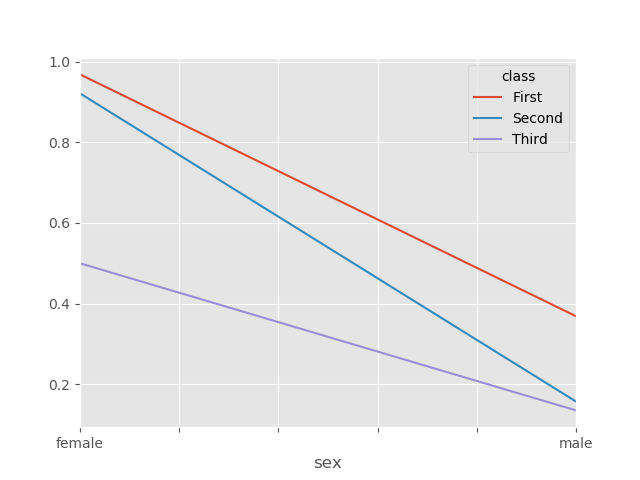

In [24]:
# Analise de sobrevivencia por sexo por Classe
dftitanic.pivot_table('survived', index='sex', columns='class').plot()

In [528]:
# Analise de sobreviventes por sexo com valores absolutos
dftitanic.pivot_table(index="class",columns="survived",aggfunc='size',fill_value=0)

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


<IPython.core.display.Javascript object>


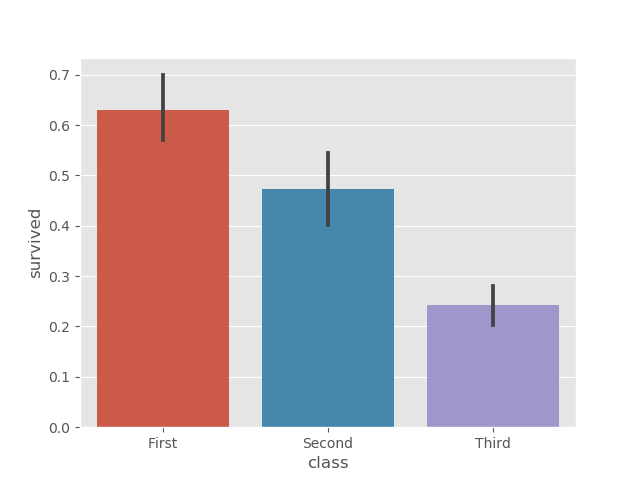

In [25]:
# Analise de taxa de sobrevivencia por classe.
%matplotlib notebook
sns.barplot(x='class', y='survived', data=dftitanic)

#### `Conclusões`:

- *Podemos visualizar no grafico acima que o maior indice de sobrevivencia foi para passageiros da 1ª Classe, depois 2ª Classe e por ultimo 3ª Classe.*

In [26]:
# Analise de sobreviventes por faixa de idade
age = pd.cut(dftitanic['age'], [0, 18, 80])
dftitanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [27]:
# Analise de sobreviventes por faixa de idade
age= pd.cut(dftitanic['age'], [0, 18, 80])
dftitanic.pivot_table(index=["sex",age], columns=["class","survived"],aggfunc='size',fill_value=0)

class           First     Second     Third    
survived            0   1      0   1     0   1
sex    age                                    
female (0, 18]      1  10      0  14    21  22
       (18, 80]     2  72      6  54    34  25
male   (0, 18]      1   4      6   9    40  11
       (18, 80]    60  36     78   6   175  27

<IPython.core.display.Javascript object>


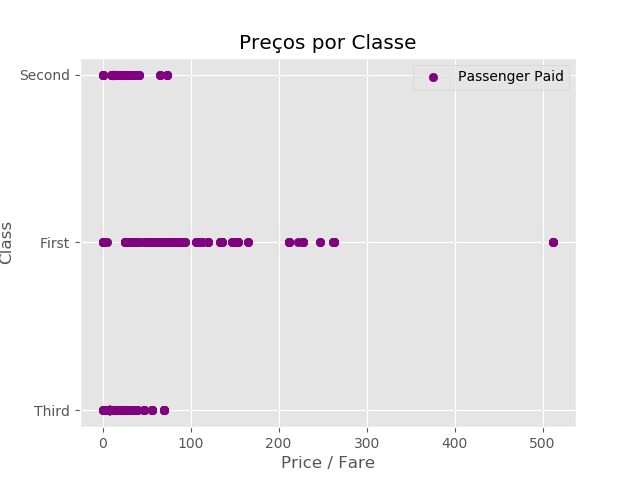

In [28]:
# Analise de preços por Classe
%matplotlib notebook
plt.scatter(dftitanic['fare'], dftitanic['class'],  color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Preços por Classe')
plt.legend()
plt.show()

#### `Conclusões`:

- *Podemos visualizar no grafico acima a dispersão dos valores da passagem por Classe, notar que a 1ª classe e 2ª classe possuem uma dispersão muito maior em relação a 3ª classe.*

### A Frequencia de todos os Valores das Variaveis 

In [29]:
# Frequencia de todas as variaveis do dataframe
for val in dftitanic:
   print(dftitanic[val].value_counts())
   print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp,

### Visualizando a Correlação entre algumas variáveis

- O quanto alguma variável numérica tem correlação com outra variável ?
- Correlação pode ser positiva ou negativa

In [30]:
# visualizando as variaveis numericas , as 5 primeiras linhas
dftitanic[['pclass','age','sibsp','parch','fare']].head()

,pclass,age,sibsp,parch,fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


- Calcula a correlação com método corr()

In [31]:
## Correlacao entre variaveis numericas ( por padrao a função utliza metodo = Pearson, sendo possivel alterar este parametro)
dftitanic[['pclass','age','sibsp','parch','fare']].corr()

,pclass,age,sibsp,parch,fare
pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,-0.549500,0.096067,0.159651,0.216225,1.000000


In [32]:
# criar um dataframe para armazenar os valores de correlacao
correlacoes = dftitanic[['pclass','age','sibsp','parch','fare']].corr()

In [33]:
type(correlacoes)

pandas.core.frame.DataFrame

In [34]:
# escolha de temas e colormaps 
#https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

### o Grafico Heatmap para visualizar as correlações ###

<IPython.core.display.Javascript object>


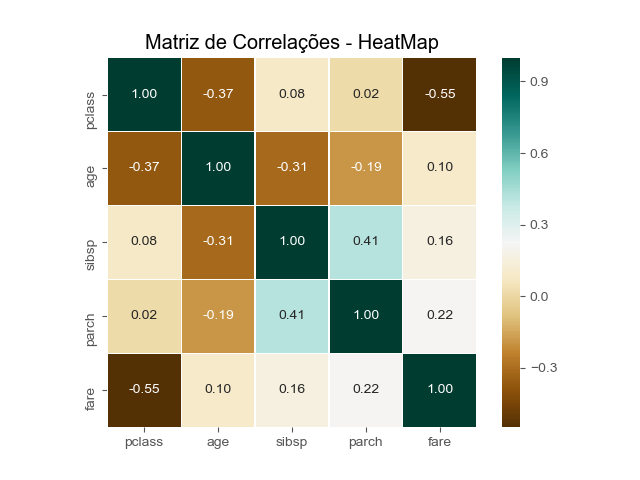

Text(0.5, 1.0, 'Matriz de Correlações - HeatMap')

In [35]:
# plotar um grafico de correlacoes, utilizando o metodo heatmap da library seaborn
%matplotlib notebook
sns.heatmap(correlacoes, annot=True, cmap='BrBG', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white')
plt.title('Matriz de Correlações - HeatMap')

#### `Conclusões`:

- *O gráfico de calor .*
- *Podemos ver que existe uma correlação inversa relativa entre pclass que representa as Classes e os Preços de Passagens.*
- *Podemos ver que existe uma correlação inversa relativa entre pclass que representa as Classes e Age as idades.*

## 4 Preparação dos Dados

Até esta etapa, importarmos os dados, formulamos hipóteses, iniciamos uma análise exploratória dos dados ( EDA ) e visualizamos graficos e correlações entre variáveis que julgamos pertinentes na preparação do nosso modelo.

Neste momento iremos selecionar quais variaveis possuem relevancia para a construção do modelo, verificar ausencia de valores ( NaN ) e proceder com o preenchimento adequado, tratar variaveis categoricas e retirar variaveis redundantes.

### Construindo um Modelo de Machine Learning

In [36]:
dftitanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Pre-processando os dados**

- Precisamos pré-processar algumas colunas, pois, são colunas categóricas.
- Nesta etapa também removemos colunas não importantes para o modelo e\ou que apresentam um numero excessivo de NaN.

**Removendo as colunas adult_male, embarked, class, alone, alive e deck.**

In [37]:
# Variaveis Redundantes
# Retiramos a variavel 'adult_male' pois é um dado ao qual pode ser obtido a mesma informação da variavel who(man).
# Retiramos a variavel 'embarked' pois é uma abreviação (sigla) da variavel embarked_town.
# Retiramos a variavel 'class' pois é uma forma extensa da variavel pclass.
# Retiramos a variavel 'alone' pois é um atributo ao qual pode ser obtido a mesma informação do conjunto de variaveis sibsp e 
# patch , para (0,0) alone(True) do contrario False.
# Retiramos a variavel 'alive' pois 
dftitanic.drop(['adult_male','embarked','class','alone','alive'], axis=1, inplace=True)

In [38]:
# Variavel com numero elevado de Nan, acima de 77,22% , ( 688/891 ).
# Retiramos a variavel 'deck' pois apresenta um numero significativamente elevcado de Nan e pela falta de dados que pudessemos
# realizar um preenchimento coerente.
dftitanic.drop('deck', axis=1, inplace=True)

In [39]:
dftitanic.shape

(891, 9)

In [40]:
dftitanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
who              0
embark_town      2
dtype: int64

In [41]:
# Variavel embark_town possui 2 registros com valor NnN.
# podemos adotar aqui alguns metodos Back-fill ou forward-fill, Drop Column, Drop Rows
# Levando em consideração o numero reduzido de registros (2), iremos dropar as linhas ao qual a variavel embark_town seja Nan
dftitanic.dropna(subset=['embark_town'], inplace=True)

**Substituindo valores ausentes (Nan) na variavel age.**

A unica variavel restante que contem valores ausentes é 'age', 177 registros,  vou aplicar uma tecnica de preenchimento de valores com a media da variavel 'age' agrupado por ['sex_female','sex_male','who_child','who_man','who_woman']. dessa forma consigo preencher uma valor mais proximo da representação.

In [42]:
# O uso desse conjunto de metodos permite identificar qua(l)(is) campo(s) possuem valor null (NaN ) e qtos registros
dftitanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
who              0
embark_town      0
dtype: int64

In [43]:
# dftitanic["age"]=dftitanic.groupby(['sex_female','sex_male','who_child','who_man','who_woman'])['age'].transform(lambda x: x.fillna(x.mean()))
dftitanic["age"]=dftitanic.groupby(['sex','who'])['age'].transform(lambda x: x.fillna(x.mean()))

In [44]:
# O uso desse conjunto de metodos permite identificar qua(l)(is) campo(s) possuem valor null (NaN ) e qtos registros
dftitanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
embark_town    0
dtype: int64

### Apresentando o preenchimento num df teste, demonstração do metodo aplicado para preenchimento na variavel age com valores Nan subistituindo pela media agrupada por sexo e who.

![](img/titanic_tratamento_age_nan.png)

In [45]:
# visualizando as linhas(5) iniciais do dataframe após a exclusao.
dftitanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town
0,0,3,male,22.0,1,0,7.2500,man,Southampton
1,1,1,female,38.0,1,0,71.2833,woman,Cherbourg
2,1,3,female,26.0,0,0,7.9250,woman,Southampton
3,1,1,female,35.0,1,0,53.1000,woman,Southampton
4,0,3,male,35.0,0,0,8.0500,man,Southampton


Analisando o dataframe acima podemos verificar que temos 3 variaveis categoricas que necessitam passar por um processo de Encode.

**Aplicando Pandas-Get_dummies para codificação de variáveis categóricas**

Esse codificador gera uma coluna para cada classe da variavel categorica, neste caso em questão o impacto na geração de novas colunas para cada classe é minimo pois o nivel maximo de classes por variavel não é maior que 3.

In [46]:
# Aplicando o get_dummies nos dados.
dftitanic = pd.get_dummies(dftitanic, columns=['sex','who','embark_town'], prefix=['sex','who','embarktown'], drop_first=True)

-**`Visualizando as dimensoes ( linhas, colunas ) do Dataframe Modificado`**

In [47]:
# verificando as dimensões do DataFrame.
# utilizamos o metodo shapeao qual nos fornece o numero de linhas ( shape[0] ) e colunas ( shape[1] ).
print("Variaveis:\t{}\nRegistros:\t{}".format(dftitanic.shape[1], dftitanic.shape[0]))

Variaveis:	11
Registros:	889


**Dados transformados**

In [48]:
dftitanic.head(10)

,survived,pclass,age,sibsp,parch,fare,sex_male,who_man,who_woman,embarktown_Queenstown,embarktown_Southampton
0,0,3,22.000000,1,0,7.2500,1,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1,0,1
4,0,3,35.000000,0,0,8.0500,1,1,0,0,1
5,0,3,33.173123,0,0,8.4583,1,1,0,1,0
6,0,1,54.000000,0,0,51.8625,1,1,0,0,1
7,0,3,2.000000,3,1,21.0750,1,0,0,0,1
8,1,3,27.000000,0,2,11.1333,0,0,1,0,1
9,1,2,14.000000,1,0,30.0708,0,0,0,0,0


**Separa a classe dos dados**

In [49]:
# separando a variavel target
y = dftitanic['survived']

In [50]:
# print a variavel de saida , dependente
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [51]:
X = dftitanic.drop(['survived'], axis=1)

In [52]:
X.head()

,pclass,age,sibsp,parch,fare,sex_male,who_man,who_woman,embarktown_Queenstown,embarktown_Southampton
0,3,22.0,1,0,7.2500,1,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,1
4,3,35.0,0,0,8.0500,1,1,0,0,1


In [53]:
X.shape

(889, 10)

<IPython.core.display.Javascript object>


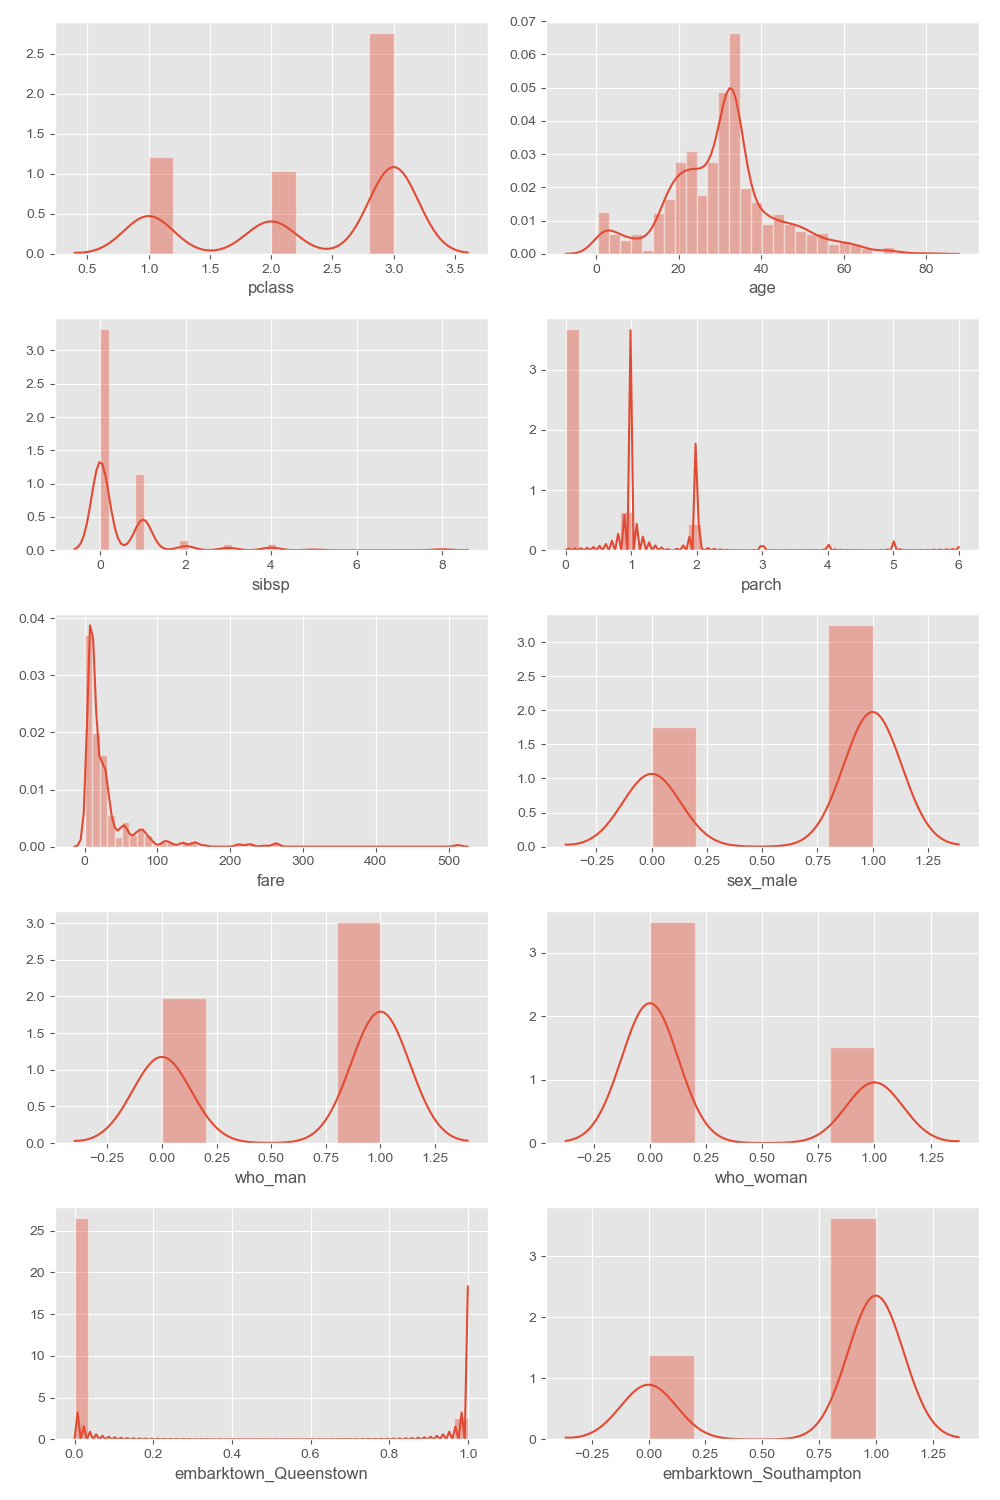

In [54]:
#ANALISE DAS DISTRIBUICOES DE CADA VARIAVEL INDEPENDENTE
nr_rows = 5
nr_cols = 2

cols_review = ['pclass', 'age', 'sibsp', 'parch', 'fare','sex_male','who_man','who_woman', 'embarktown_Queenstown','embarktown_Southampton']

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*3), squeeze=False)

for r in range(0,nr_rows):
    for c in range(0, nr_cols):  
        col = r*nr_cols+c
        if col < len(cols_review):
            sns.set(style="darkgrid")
            #sns.kdeplot(dftitanic[cols_review[col]],ax =axs[r][c])
            sns.distplot(dftitanic[cols_review[col]],ax =axs[r][c])
            #plt.ylabel('Number of Occurrences', fontsize=12)
            #plt.xlabel(col, fontsize=12)
plt.tight_layout()    
plt.show()

<IPython.core.display.Javascript object>


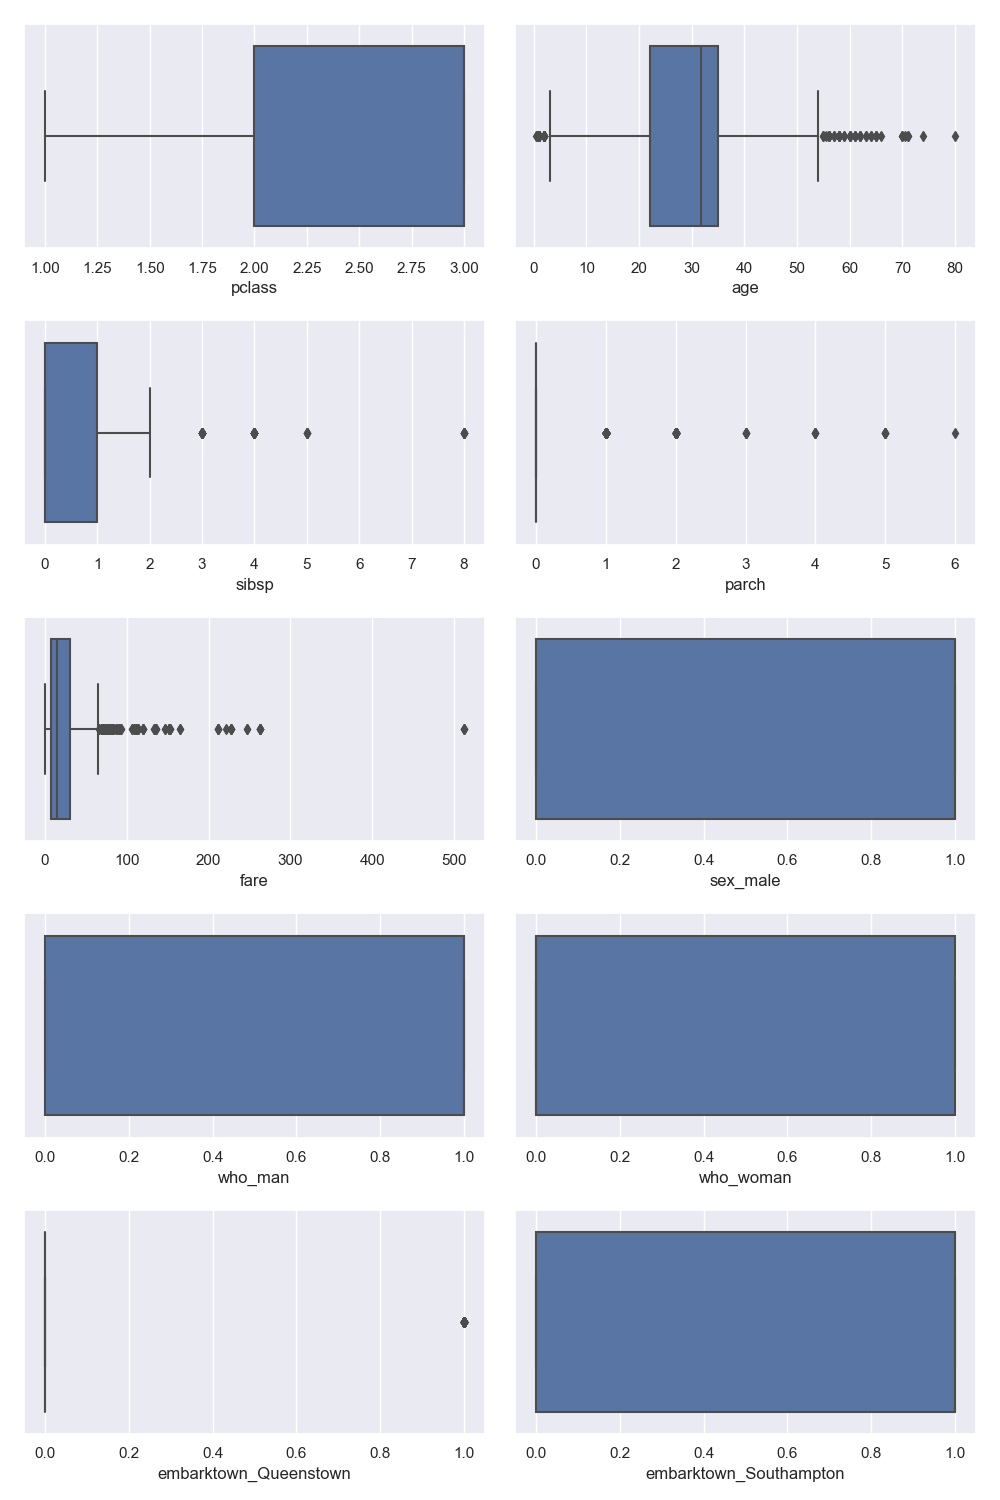

In [450]:
#ANALISE DAS MEDIDAS CENTRAIS DE CADA VARIAVEL INDEPENDENTE
nr_rows = 5
nr_cols = 2

cols_review = ['pclass', 'age', 'sibsp', 'parch', 'fare','sex_male','who_man','who_woman', 'embarktown_Queenstown','embarktown_Southampton']

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*3), squeeze=False)

for r in range(0,nr_rows):
    for c in range(0, nr_cols):  
        col = r*nr_cols+c
        if col < len(cols_review):
            sns.set(style="darkgrid")
            sns.boxplot(dftitanic[cols_review[col]],ax =axs[r][c])
plt.tight_layout()    
plt.show()

### **Separando os dados de treino e teste**

In [55]:
from sklearn.model_selection import train_test_split

In [56]:

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

In [57]:
X_treino.count()

pclass                    666
age                       666
sibsp                     666
parch                     666
fare                      666
sex_male                  666
who_man                   666
who_woman                 666
embarktown_Queenstown     666
embarktown_Southampton    666
dtype: int64

In [58]:
y_treino.count()

666

In [59]:
X_treino.head()

,pclass,age,sibsp,parch,fare,sex_male,who_man,who_woman,embarktown_Queenstown,embarktown_Southampton
611,3,33.173123,0,0,7.0500,1,1,0,0,1
637,2,31.000000,1,1,26.2500,1,1,0,0,1
796,1,49.000000,0,0,25.9292,0,0,1,0,1
836,3,21.000000,0,0,8.6625,1,1,0,0,1
20,2,35.000000,0,0,26.0000,1,1,0,0,1


In [60]:
y_treino.head()

611    0
637    0
796    1
836    0
20     0
Name: survived, dtype: int64

In [61]:
X_teste.count()

pclass                    223
age                       223
sibsp                     223
parch                     223
fare                      223
sex_male                  223
who_man                   223
who_woman                 223
embarktown_Queenstown     223
embarktown_Southampton    223
dtype: int64

In [62]:
y_teste.count()

223

In [63]:
X_teste.head()

,pclass,age,sibsp,parch,fare,sex_male,who_man,who_woman,embarktown_Queenstown,embarktown_Southampton
297,1,2.000000,1,2,151.5500,0,0,0,0,1
244,3,30.000000,0,0,7.2250,1,1,0,0,0
792,3,31.833333,8,2,69.5500,0,0,1,0,1
106,3,21.000000,0,0,7.6500,0,0,1,0,1
713,3,29.000000,0,0,9.4833,1,1,0,0,1


In [64]:
y_teste.head()

297    0
244    0
792    0
106    1
713    0
Name: survived, dtype: int64

## 5 Construção dos Modelos e Avaliações

**Aplicando Machine Learning com os algoritmos (Logistic, KNN, SVC, GaussianNB, DecisionTreeClassifier e RFC).**

In [65]:
# Função com alguns modelos para analise
def models(X_train,Y_train):
  
  #Utilizando  Logistic Regression Algorithm para o conjunto de treino
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0, solver='lbfgs')
  log.fit(X_train, Y_train)
  
  #Utilizando KNeighborsClassifier para o conjunto de treino
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Utilizando SVC-Support Vector Machine Algorithm para o cojunto de treino com kernel=linear
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', gamma='auto', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Utilizando SVC-Support Vector Machine Algorithm para o cojunto de treino com kernel=RBF
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', gamma='auto', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Utilizando GaussianNB - para o conjunto de treino
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Utilizando DecisionTreeClassifier - para o conjunto de treino
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Utilizando RandomForestClassifier - para o conjunto de treino
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print a acuracia dos modelos com referencia aos dados de treino.
  print('[0]Logistic Regression Training Acuracia:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Acuracia:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Acuracia:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Acuracia:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Acuracia:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Acuracia:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Acuracia:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

### 5.a Avaliações utilizando a Tecnica MinMaxScaler

* Bem utilizado em variaveis que possuem uma distribuição Gaussiana ( Normal ) ou outro tipo de distribuição.
* Padroniza a escala dos dados sem interferir na sua forma.
* Sofrem influencia de variaveis que possuam outliers.

## **Aplica a Técnica de MinMaxScaler**

In [66]:
# importa o modulo de pre-processamento de dados
from sklearn.preprocessing import MinMaxScaler

In [67]:
# armazenando os nomes das variaveis
column_names_X = X.columns
column_names_X

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'who_man',
       'who_woman', 'embarktown_Queenstown', 'embarktown_Southampton'],
      dtype='object')

In [68]:
mms = MinMaxScaler()

In [69]:
X_treino_mms  = pd.DataFrame(mms.fit_transform(X_treino.astype(float)), columns=column_names_X)
X_teste_mms   = pd.DataFrame(mms.fit_transform(X_teste.astype(float)), columns=column_names_X)

**Ajustando os modelos com o conjunto de dados de TREINO e analisando os resultados de Score para MinMaxScaler.**

In [71]:
#Executando o ajuste dos modelos e analisando os resultados de acuracia 
model = models(X_treino_mms,y_treino)

[0]Logistic Regression Training Acuracia: 0.8228228228228228
[1]K Nearest Neighbor Training Acuracia: 0.8708708708708709
[2]Support Vector Machine (Linear Classifier) Training Acuracia: 0.8063063063063063
[3]Support Vector Machine (RBF Classifier) Training Acuracia: 0.8003003003003003
[4]Gaussian Naive Bayes Training Acuracia: 0.7972972972972973
[5]Decision Tree Classifier Training Acuracia: 0.984984984984985
[6]Random Forest Classifier Training Acuracia: 0.978978978978979


**Montando a matriz de Confusao para apresentação dos resultados de TESTE para MinMaxScaler.**

In [73]:
from sklearn.metrics import confusion_matrix 
modelsname=['Logistic Regression','K Nearest Neighbor','Support Vector Machine (Linear Classifier)','Support Vector Machine (RBF Classifier)','Gaussian Naive Bayes Training Accuracy','Decision Tree Classifier Training','Random Forest Classifier']
for i in range(len(model)):
    cm = confusion_matrix(y_teste, model[i].predict(X_teste_mms)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_teste, model[i].predict(X_teste_mms)).ravel()
    #print(cm)
    print('[{}]{} Testing Acuracia = {} : Precisao = {}'.format(i, modelsname[i], (TP + TN) / (TP + TN + FN + FP), (TP) / (TP + FP)))
    #print('[{}]{} - Testing Acuracia - Precisao = {} : {}'.format(i, modelsname[i], (TP + TN) / (TP + TN + FN + FP), (TP) / (TP + FP)))
    #print()  # Print uma linha em branco

[0]Logistic Regression Testing Acuracia = 0.8071748878923767 : Precisao = 0.8028169014084507
[1]K Nearest Neighbor Testing Acuracia = 0.7937219730941704 : Precisao = 0.7941176470588235
[2]Support Vector Machine (Linear Classifier) Testing Acuracia = 0.8026905829596412 : Precisao = 0.7763157894736842
[3]Support Vector Machine (RBF Classifier) Testing Acuracia = 0.7668161434977578 : Precisao = 0.7428571428571429
[4]Gaussian Naive Bayes Training Accuracy Testing Acuracia = 0.7892376681614349 : Precisao = 0.76
[5]Decision Tree Classifier Training Testing Acuracia = 0.7802690582959642 : Precisao = 0.7402597402597403
[6]Random Forest Classifier Testing Acuracia = 0.8161434977578476 : Precisao = 0.8082191780821918


### 5.b Avaliações utilizando a Tecnica StandardScaler

* Bem utilizado em variaveis que possuem uma distribuição Gaussiana ( Normal ).
* Sensivel na presença de outliers.
* Não guarantem o balanceamento ( escala ) das variaveis na presença de outliers.


## **Aplica a Técnica de StandardScaler**

In [74]:
# importa o modulo de pre-processamento de dados
from sklearn.preprocessing import StandardScaler

In [75]:
# armazenando os nomes das variaveis
column_names_X = X.columns
column_names_X

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'who_man',
       'who_woman', 'embarktown_Queenstown', 'embarktown_Southampton'],
      dtype='object')

In [76]:
sc = StandardScaler()
X_treino_ss  = pd.DataFrame(sc.fit_transform(X_treino.astype(float)), columns=column_names_X)
X_teste_ss  = pd.DataFrame(sc.fit_transform(X_teste.astype(float)), columns=column_names_X)

**Ajustando os modelos com o conjunto de dados de TREINO e analisando os resultados de Score para StandardScaler.**

In [78]:
#Executando o ajuste dos modelos e analisando os resultados de acuracia 
model = models(X_treino_ss,y_treino)

[0]Logistic Regression Training Acuracia: 0.8273273273273273
[1]K Nearest Neighbor Training Acuracia: 0.8603603603603603
[2]Support Vector Machine (Linear Classifier) Training Acuracia: 0.8153153153153153
[3]Support Vector Machine (RBF Classifier) Training Acuracia: 0.8483483483483484
[4]Gaussian Naive Bayes Training Acuracia: 0.7972972972972973
[5]Decision Tree Classifier Training Acuracia: 0.984984984984985
[6]Random Forest Classifier Training Acuracia: 0.978978978978979


**Montando a matriz de Confusao para apresentação dos resultados de TESTE para StandardScaler.**

In [80]:
from sklearn.metrics import confusion_matrix 
modelsname=['Logistic Regression','K Nearest Neighbor','Support Vector Machine (Linear Classifier)','Support Vector Machine (RBF Classifier)','Gaussian Naive Bayes Training Accuracy','Decision Tree Classifier Training','Random Forest Classifier']
for i in range(len(model)):
    cm = confusion_matrix(y_teste, model[i].predict(X_teste_ss)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_teste, model[i].predict(X_teste_ss)).ravel()
    #print(cm)
    print('[{}]{} Testing Acuracia = {} : Precisao = {}'.format(i, modelsname[i], (TP + TN) / (TP + TN + FN + FP), (TP) / (TP + FP)))
    #print('[{}]{} - Testing Acuracia - Precisao = {} : {}'.format(i, modelsname[i], (TP + TN) / (TP + TN + FN + FP), (TP) / (TP + FP)))
    #print('[{}]{} - Testing Acuracia = "{} !"'.format(i, modelsname[i], (TP + TN) / (TP + TN + FN + FP)))
    #print('[{}]{} - Testing Precisao = "{} !"'.format(i, modelsname[i], (TP) / (TP + FP)))    
    #print() # Print uma linha em branco

[0]Logistic Regression Testing Acuracia = 0.820627802690583 : Precisao = 0.7875
[1]K Nearest Neighbor Testing Acuracia = 0.7443946188340808 : Precisao = 0.6883116883116883
[2]Support Vector Machine (Linear Classifier) Testing Acuracia = 0.8295964125560538 : Precisao = 0.8243243243243243
[3]Support Vector Machine (RBF Classifier) Testing Acuracia = 0.8026905829596412 : Precisao = 0.85
[4]Gaussian Naive Bayes Training Accuracy Testing Acuracia = 0.7847533632286996 : Precisao = 0.7638888888888888
[5]Decision Tree Classifier Training Testing Acuracia = 0.7937219730941704 : Precisao = 0.7702702702702703
[6]Random Forest Classifier Testing Acuracia = 0.8026905829596412 : Precisao = 0.8181818181818182


### 5.c Avaliações utilizando a Tecnica RobustScaler

* Apropriado para variaveis que possuem outliers e devemos levar em consideração.

## **Aplica a Técnica de RobustScaler**

In [81]:
# importa o modulo de pre-processamento de dados
from sklearn.preprocessing import RobustScaler

In [82]:
# armazenando os nomes das variaveis
column_names_X = X.columns
column_names_X

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'who_man',
       'who_woman', 'embarktown_Queenstown', 'embarktown_Southampton'],
      dtype='object')

In [83]:
rs = RobustScaler()
X_treino_rs  = pd.DataFrame(rs.fit_transform(X_treino), columns=column_names_X)
X_teste_rs  = pd.DataFrame(rs.fit_transform(X_teste), columns=column_names_X)

**Ajustando os modelos com o conjunto de dados de TREINO e analisando os resultados de Score para RobustScaler.**

In [85]:
#Executando o ajuste dos modelos e analisando os resultados de acuracia 
model = models(X_treino_rs,y_treino)

[0]Logistic Regression Training Acuracia: 0.8288288288288288
[1]K Nearest Neighbor Training Acuracia: 0.8633633633633634
[2]Support Vector Machine (Linear Classifier) Training Acuracia: 0.8153153153153153
[3]Support Vector Machine (RBF Classifier) Training Acuracia: 0.8333333333333334
[4]Gaussian Naive Bayes Training Acuracia: 0.7972972972972973
[5]Decision Tree Classifier Training Acuracia: 0.984984984984985
[6]Random Forest Classifier Training Acuracia: 0.978978978978979


**Montando a matriz de Confusao para apresentação dos resultados de TESTE para RobustScaler.**

In [87]:
from sklearn.metrics import confusion_matrix 
modelsname=['Logistic Regression','K Nearest Neighbor','Support Vector Machine (Linear Classifier)','Support Vector Machine (RBF Classifier)','Gaussian Naive Bayes Training Accuracy','Decision Tree Classifier Training','Random Forest Classifier']
for i in range(len(model)):
    cm = confusion_matrix(y_teste, model[i].predict(X_teste_rs)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_teste, model[i].predict(X_teste_rs)).ravel()
    #print(cm)
    print('[{}]{} Testing Acuracia = {} : Precisao = {}'.format(i, modelsname[i], (TP + TN) / (TP + TN + FN + FP), (TP) / (TP + FP)))    
    #print('[{}]{} - Testing Acuracia - Precisao = {} : {}'.format(i, modelsname[i], (TP + TN) / (TP + TN + FN + FP), (TP) / (TP + FP)))
    #print('[{}]{} - Testing Acuracia= {} : Precisao= {}'.format(i, modelsname[i], (TP + TN) / (TP + TN + FN + FP), (TP) / (TP + FP)))
    #print('[{}]{} - Testing Acuracia = "{} !"'.format(i, modelsname[i], (TP + TN) / (TP + TN + FN + FP)))
    #print('[{}]{} - Testing Precisao = "{} !"'.format(i, modelsname[i], (TP) / (TP + FP)))    
    #print() # Print uma linha em branco

[0]Logistic Regression Testing Acuracia = 0.820627802690583 : Precisao = 0.8026315789473685
[1]K Nearest Neighbor Testing Acuracia = 0.7713004484304933 : Precisao = 0.7108433734939759
[2]Support Vector Machine (Linear Classifier) Testing Acuracia = 0.820627802690583 : Precisao = 0.8026315789473685
[3]Support Vector Machine (RBF Classifier) Testing Acuracia = 0.8295964125560538 : Precisao = 0.8243243243243243
[4]Gaussian Naive Bayes Training Accuracy Testing Acuracia = 0.7892376681614349 : Precisao = 0.76
[5]Decision Tree Classifier Training Testing Acuracia = 0.757847533632287 : Precisao = 0.7105263157894737
[6]Random Forest Classifier Testing Acuracia = 0.7757847533632287 : Precisao = 0.7571428571428571


**Validação do Modelo**

In [88]:
X_teste.head()

,pclass,age,sibsp,parch,fare,sex_male,who_man,who_woman,embarktown_Queenstown,embarktown_Southampton
297,1,2.000000,1,2,151.5500,0,0,0,0,1
244,3,30.000000,0,0,7.2250,1,1,0,0,0
792,3,31.833333,8,2,69.5500,0,0,1,0,1
106,3,21.000000,0,0,7.6500,0,0,1,0,1
713,3,29.000000,0,0,9.4833,1,1,0,0,1


**`Conclusões`:**

Com base nos resultados obtidos dos 7 algoritmos e das 3 técnicas de Normalização\Padronização apresentados abaixo,
optamos pela seguinte combinação.

![](img/titanic_resultado_train.png)

![](img/titanic_resultado_test.png)

- Tivemos uma **Acuracia de 80,26% e Precisão de 85%** para o Modelo SVM-(RBF).
- O modelo pode melhorar se trabalhar .

**Features mais importantes para o modelo**

**Visualizando as Features mais importantes do Modelo**

In [391]:
forest = model[6]

In [392]:
print(forest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [393]:
print(forest.feature_importances_)

[0.08423627 0.24914795 0.06304644 0.04141257 0.27573833 0.06259529
 0.13575267 0.05079845 0.01347658 0.02379546]


In [395]:
#Get the importance of the features
forest = model[6]
importances = pd.DataFrame({'feature':X_teste.iloc[:, :].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
fare,0.276
age,0.249
who_man,0.136
pclass,0.084
sibsp,0.063
sex_male,0.063
who_woman,0.051
parch,0.041
embarktown_Southampton,0.024


<IPython.core.display.Javascript object>


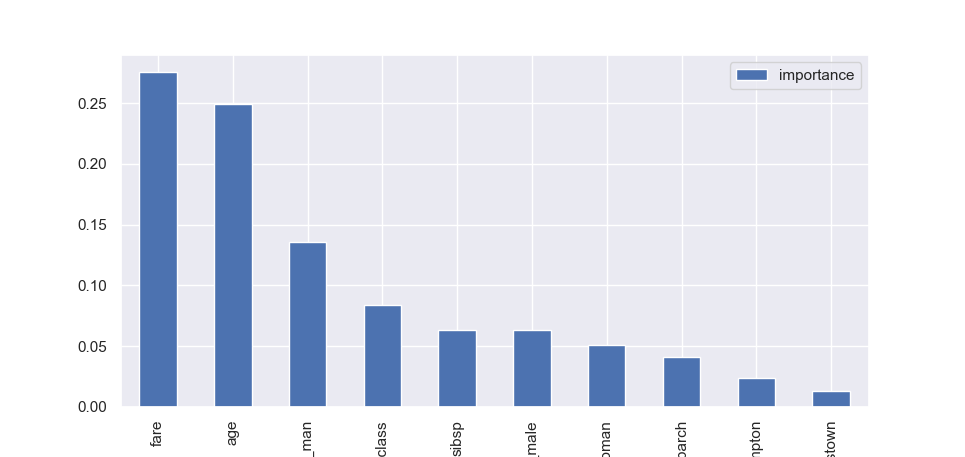

In [500]:
#Visualize the importance
importances.plot.bar()

## 6 Avaliação

Nessa analise podemos verificar que pessoas do sexo feminino, crianças tiveram um indice de sobrevivencia maior assim como pessoas da 1ª Classe   :

- Marcas 

## 7 Referências\Fontes

[Titanic - Overview](https://www.history.com/topics/early-20th-century-us/titanic#section_6), Visão Geral Titanic.

[Titanic - Caracteristicas Estruturais](https://titanicfacts.net/titanic-ship/), Informações e dados da estrutura do navio.

[Titanic - Lifeboats](https://www.historyonthenet.com/the-titanic-lifeboats), Fatos e Analises da Ocorrência do desastre.

[Scale, Standardize, Normalize](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02), Conceitos de Standartizacao, Normalizacao.  

[Scikit-learn - Scalers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html), Comparacões das técnicas sob influencia de datasets com outliers.

**Cursos:** - Abaixo uma relação de Profissionais aos quais ja tive o prazer de conhecer, realizar cursos e afirmo com total segurança a qualidade do ensino prestado.

[Minerando Dados](https://minerandodados.com.br/), Excelente Curso de Data Science , responsaveis **Felipe e Rodrigo**.

[Comunidade de Estatistica do Prof. Thiago](https://comunidadeestatistica.landen.co/), Excelente Curso de Estatistica aplicada a Data Science, Linguagem R, responsavel **Thiago Marques**.

[Statistical Learning](https://asn.rocks/), Excelente Profissional na Area de Estatistica, responsavel **Adriana Silva**.

[Aprenda Virtual](http://bicomvatapa.blogspot.com/p/sobre.html), Excelente Portal para aprendizado de BI e Data Science, responsavel **Grimaldo Lopes**.

[Sigmoidal](https://sigmoidal.ai/), Excelente Curso de Data Science, responsavel **Carlos Melo**.

[LabData - FIA](http://labdata.fia.com.br/), Excelente curso de Pós Graduação, MBA nas areas de Data Science, Datamining, responsavel **Alessandra Montini**.